In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


In [2]:
df = pd.read_csv('tennis_stats.csv')
df.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

# Simple Linear Regression

In our dataset, there are 24 column. 4 columns represent outcome variables and 18  columns are possible predictor variables for our outcome variables. The remaining 2 column are name and year which will not be involved in this model. 

In this analysis the outcome variable is refered to as the dependent variable and the predictor variable is refered to as the independent variable.

A linear regression will be performed between each dependent variable and all the independent variable, in order to find the variables with strong linear relationships.
In this analaysis a strong linear relationship is a model with a score(r squared) of greater than 75%

Accuracy: 79.76432768419909


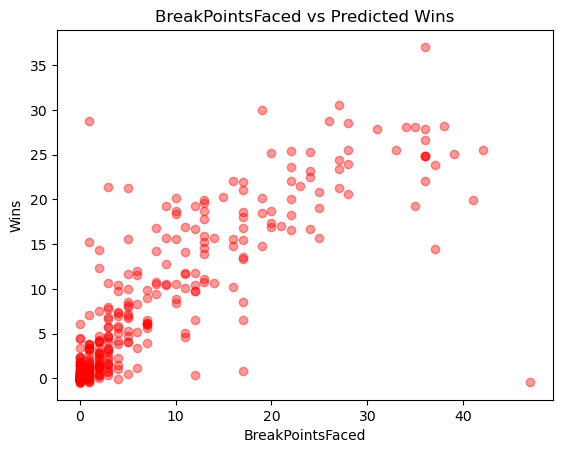

Accuracy: 87.3163936098365


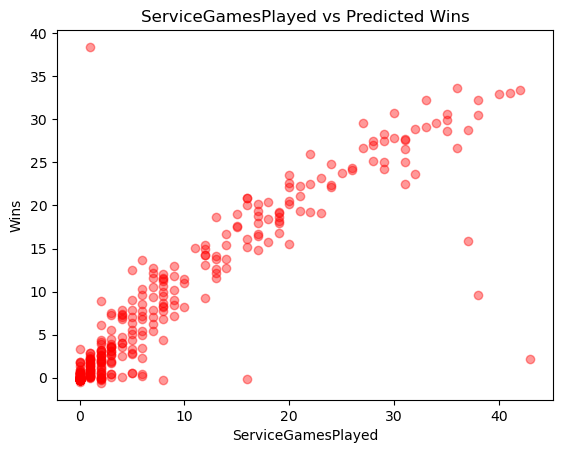

Accuracy: 84.4275372175372


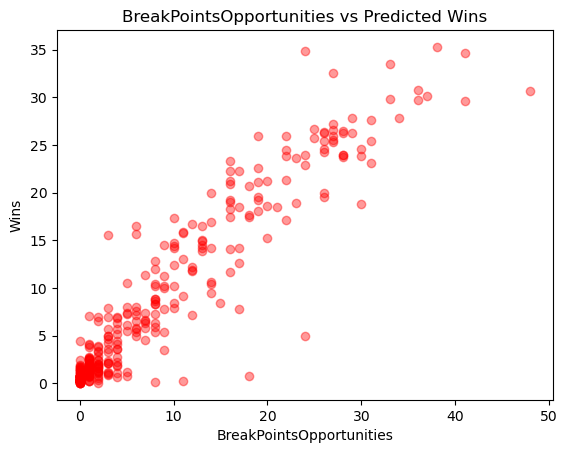

Accuracy: 88.67410992244625


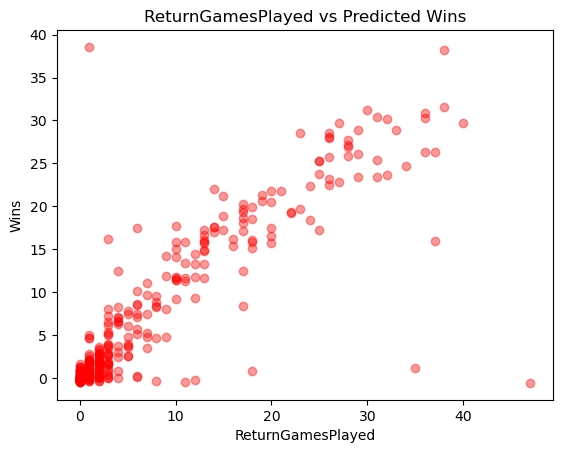

Accuracy: 78.02745528795559


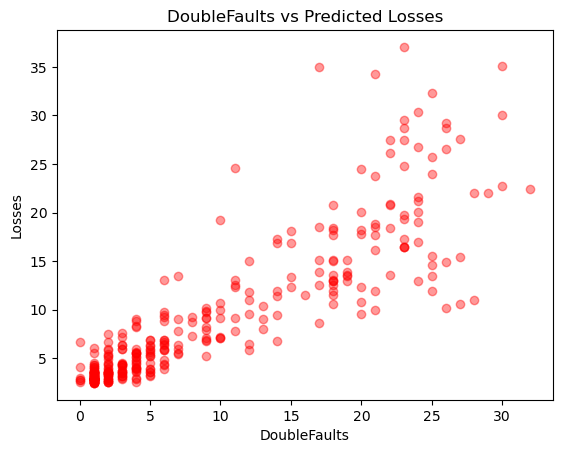

Accuracy: 89.50469327235191


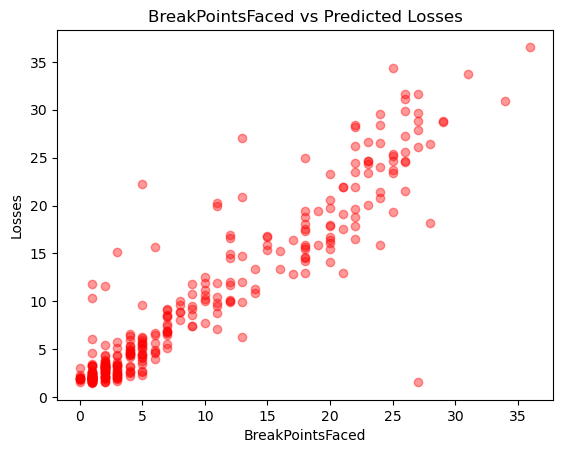

Accuracy: 87.3096459216345


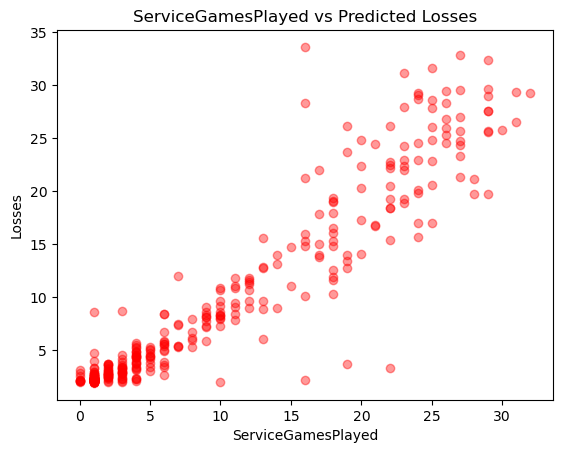

Accuracy: 83.10569583353393


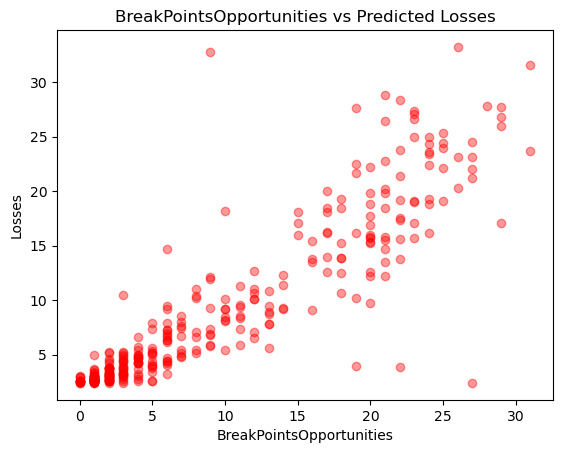

Accuracy: 87.48835116701824


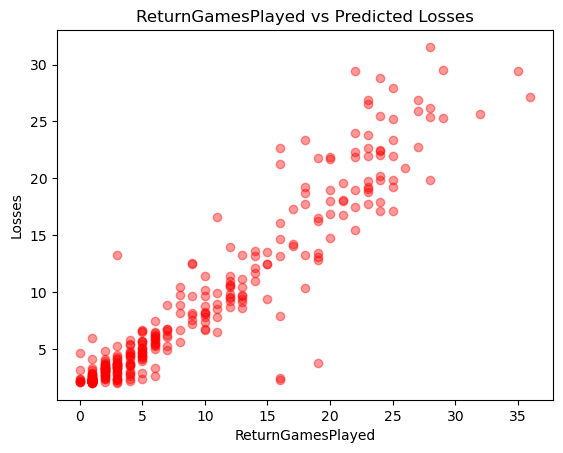

Accuracy: 76.41569090720857


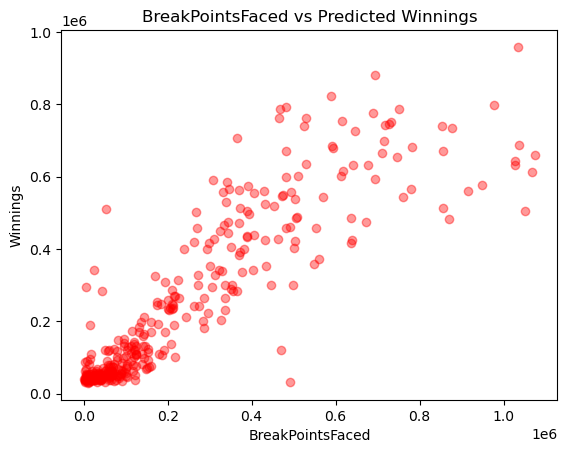

Accuracy: 82.37540724172297


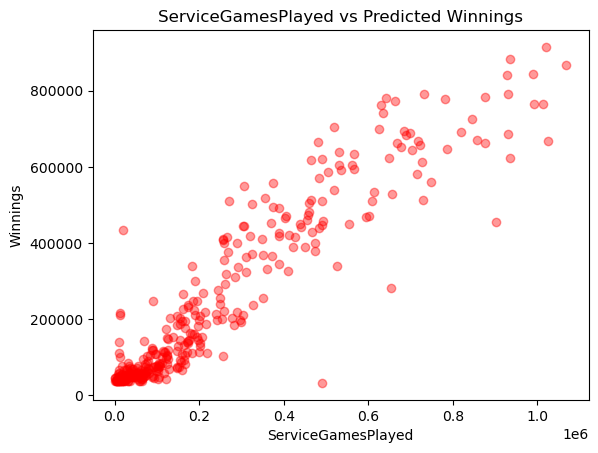

Accuracy: 81.36036081403394


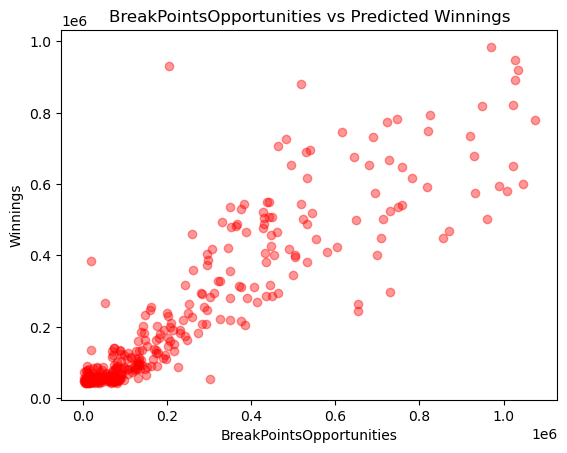

Accuracy: 82.46589070494382


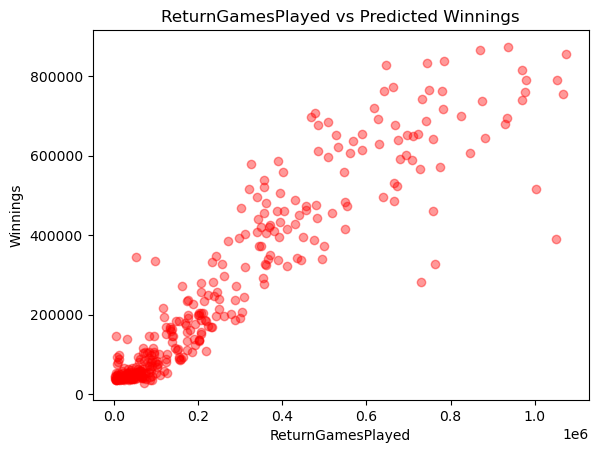

<Figure size 640x480 with 0 Axes>

In [196]:
dependent = ['Wins', 'Losses', 'Winnings', 'Ranking']
independent = ['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon', 'SecondServePointsWon', 'BreakPointsFaced',
              'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon', 'FirstServeReturnPointsWon',
              'SecondServeReturnPointsWon', 'BreakPointsOpportunities', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon',
              'ReturnPointsWon', 'TotalPointsWon']



    
for col_dep in dependent:
    i = 0
    for col_indep in independent:
        feature = df[col_indep]
        feature = feature.values.reshape(-1,1)
        outcome = df[col_dep]
        outcome = outcome.values.reshape(-1,1)
        feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature, outcome, train_size=0.8)
        model = LinearRegression()
        model.fit(feature_train, outcome_train)
        R_squared = model.score(feature_train, outcome_train) * 100

        if R_squared > 75.00:
            prediction = model.predict(feature_test)
            print('Accuracy: ' + str(R_squared))
            plt.scatter(outcome_test, prediction, alpha= 0.4, color=['red'])
            plt.title(col_indep + ' vs Predicted ' + col_dep)
            plt.xlabel(col_indep)
            plt.ylabel(col_dep)
            plt.show()
            plt.clf()

#  Multiple Linear Regression

In this case multiple(2) variables will be used to predict the earnings(Winnings) of a player.
In this analaysis a strong linear relationship is a model with a score(r squared) of greater than 75%

Accuracy: 77.15381799587352


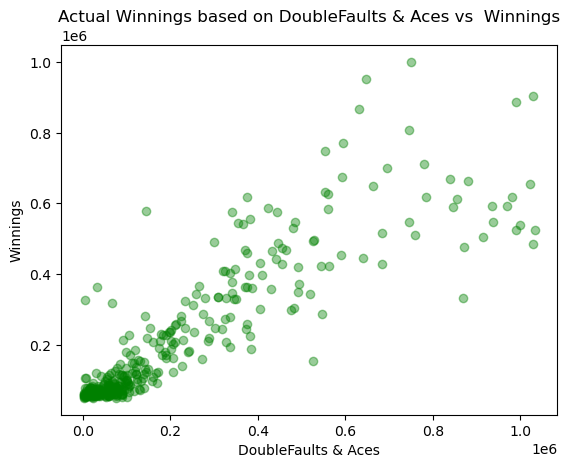

Accuracy: 76.31500017559067


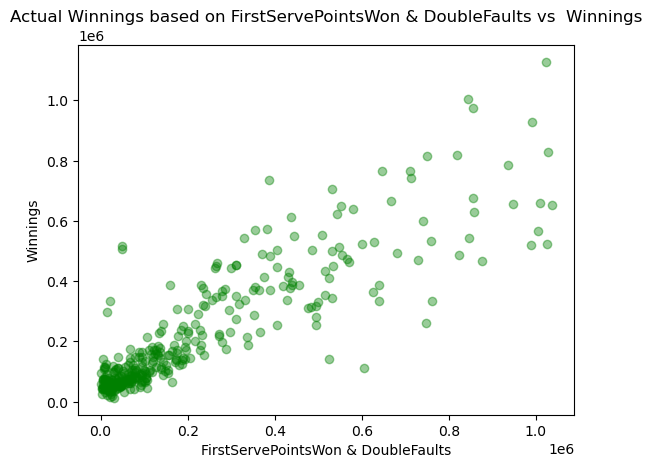

Accuracy: 81.23655929415992


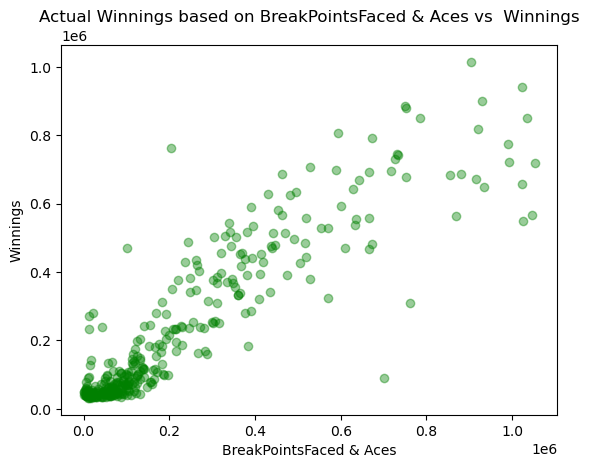

Accuracy: 82.25077444158906


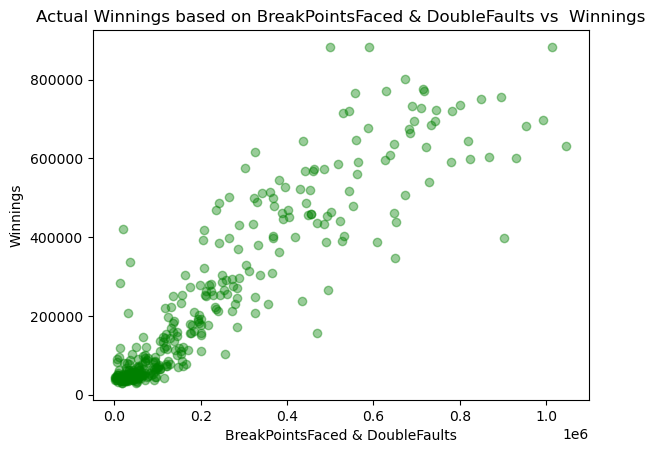

Accuracy: 77.26190623228028


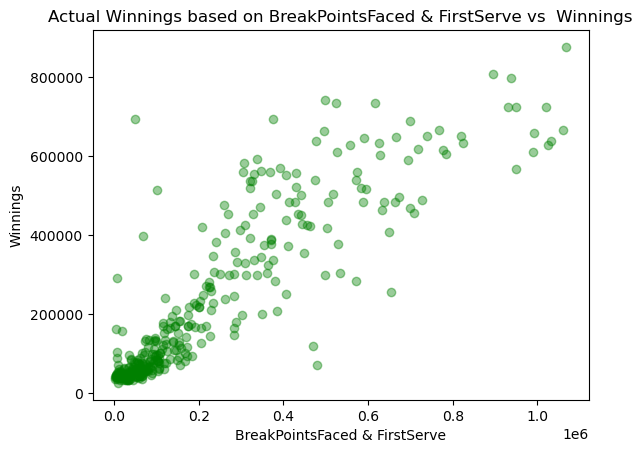

Accuracy: 79.87016080600597


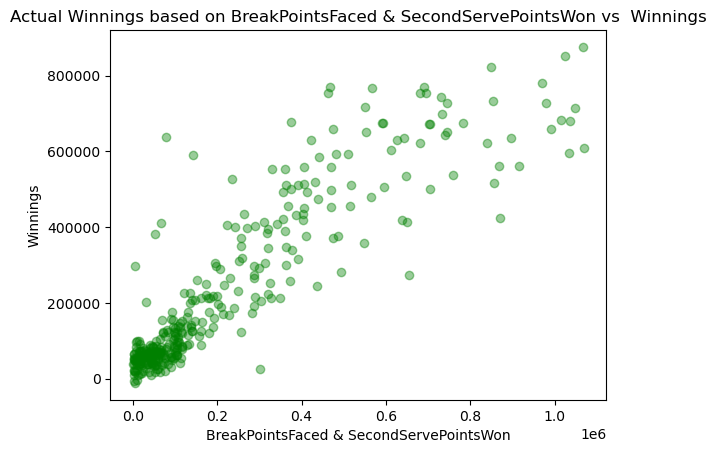

Accuracy: 86.89971859972945


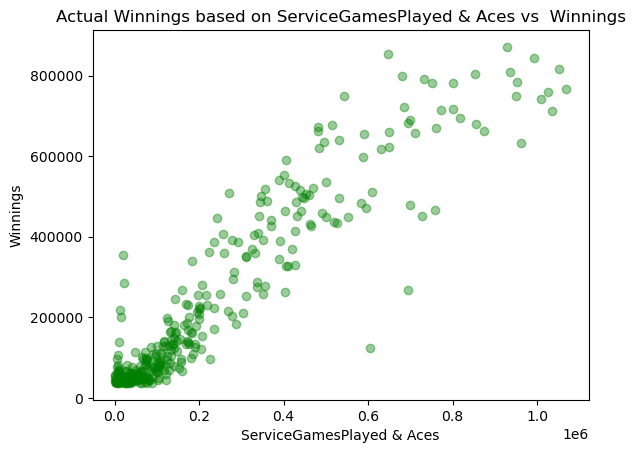

Accuracy: 86.52668559035683


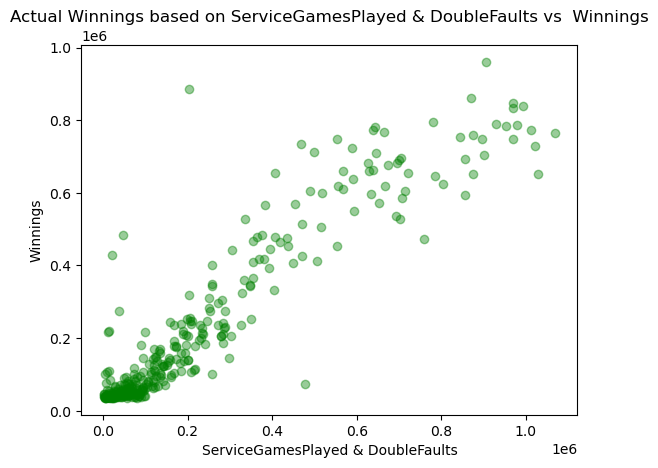

Accuracy: 88.50740586044348


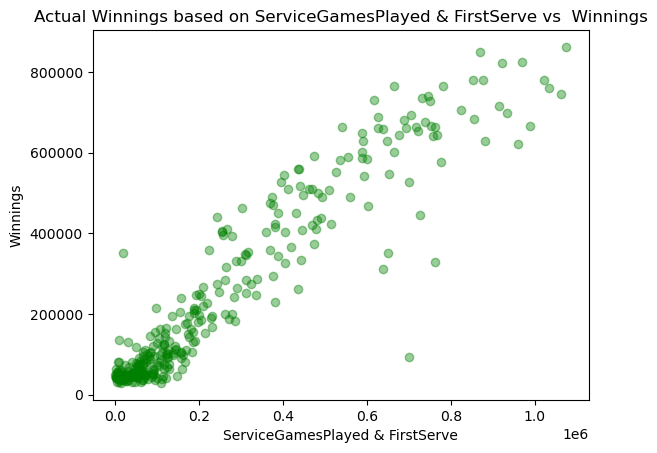

Accuracy: 84.04088533743617


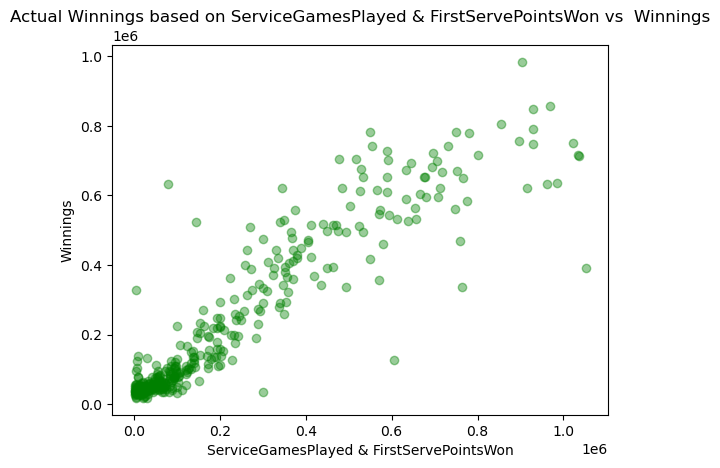

Accuracy: 82.32477420480525


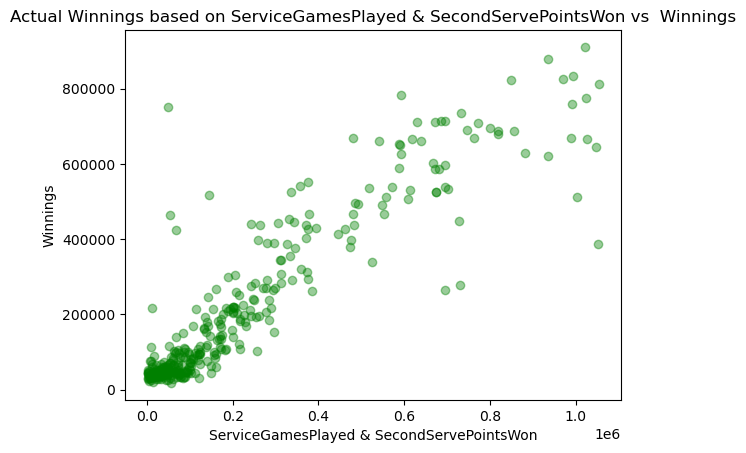

Accuracy: 87.1000271981944


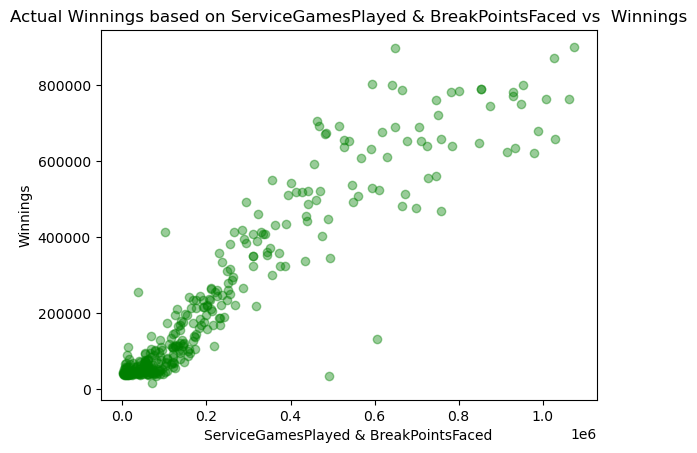

Accuracy: 82.17861339637298


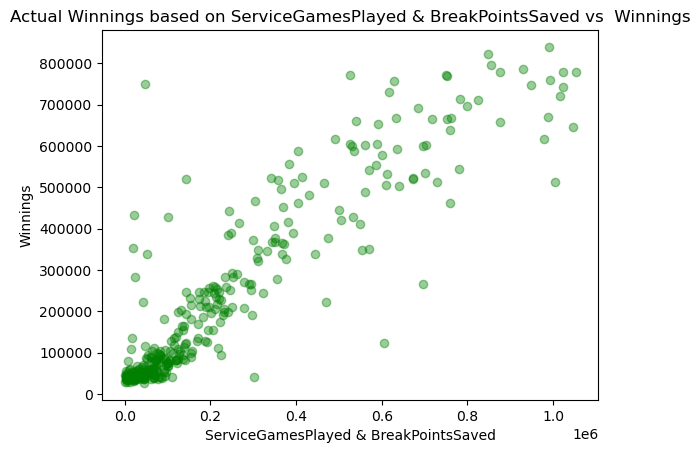

Accuracy: 76.00174001387087


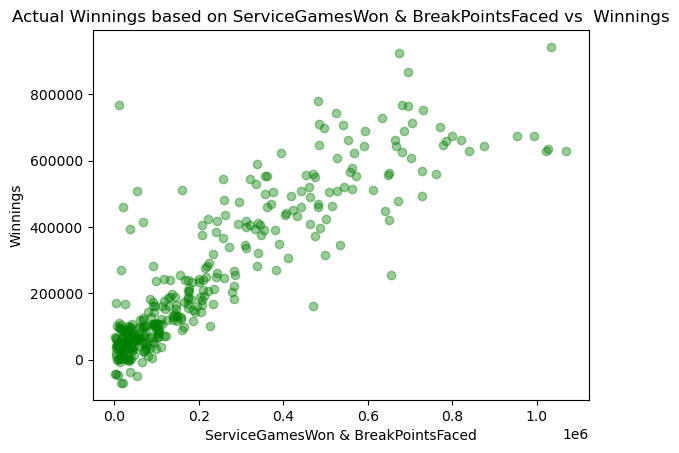

Accuracy: 77.44726032520177


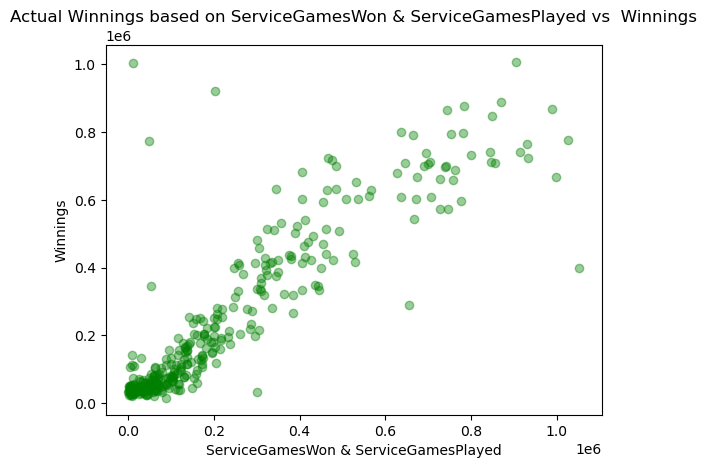

Accuracy: 79.2326579427721


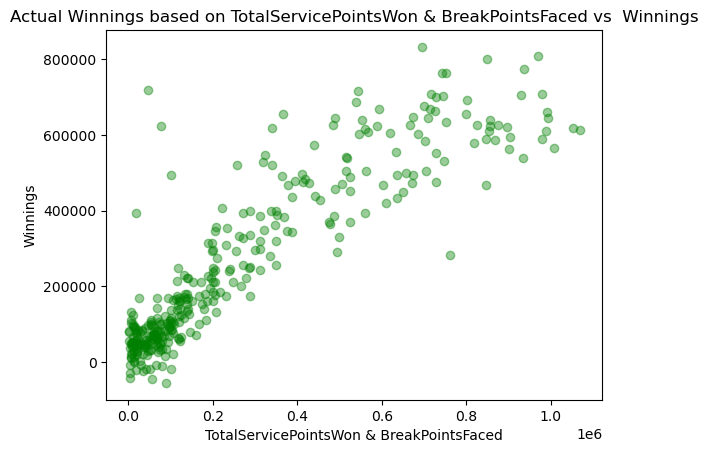

Accuracy: 87.44250752638382


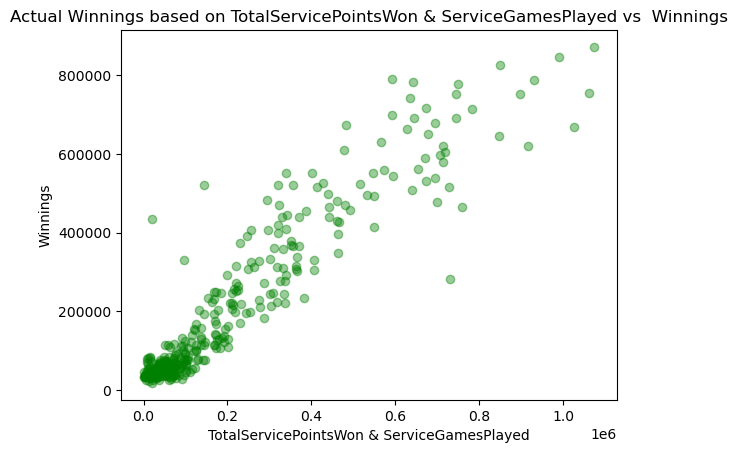

Accuracy: 78.62970606822796


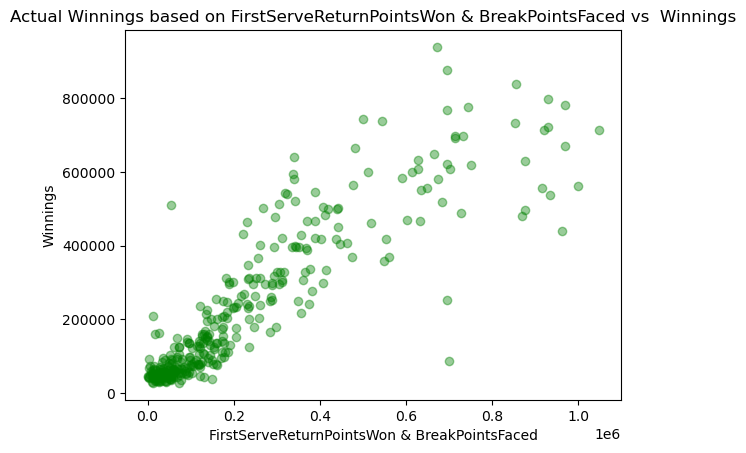

Accuracy: 83.97515705334693


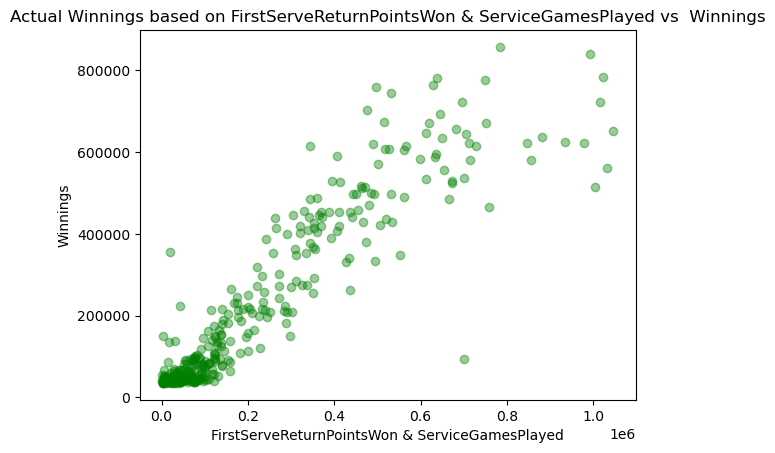

Accuracy: 76.2211604579745


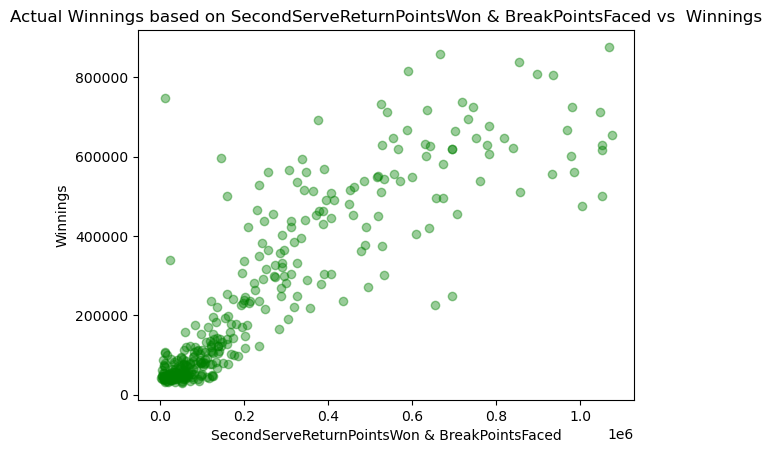

Accuracy: 76.04330583025101


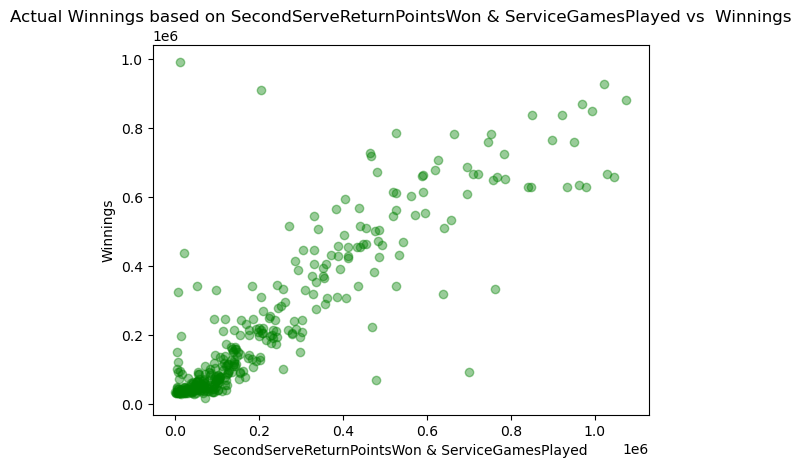

Accuracy: 83.15307334570913


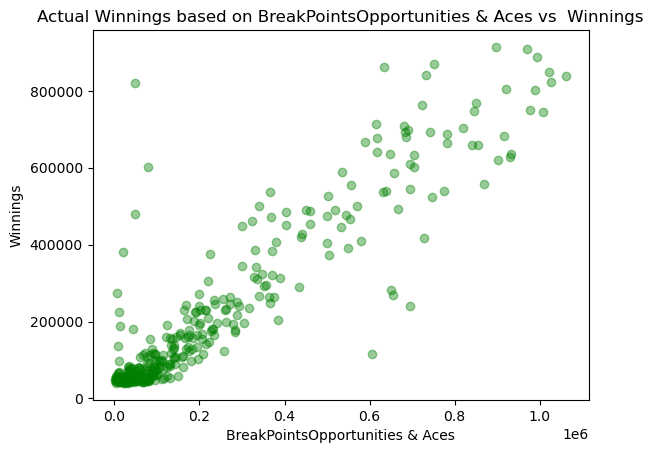

Accuracy: 85.98987388319223


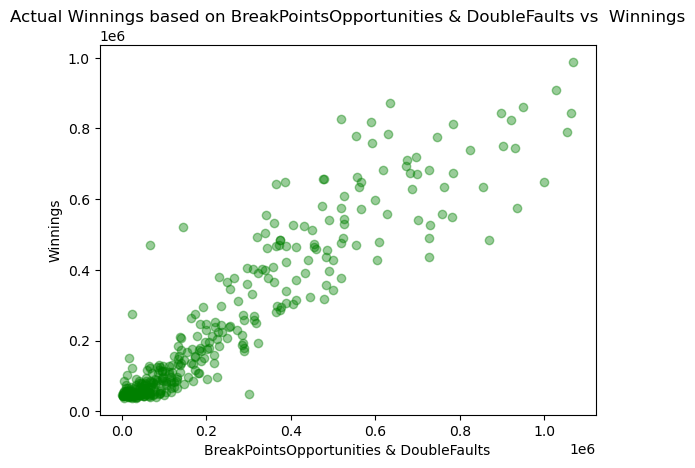

Accuracy: 76.3463446809418


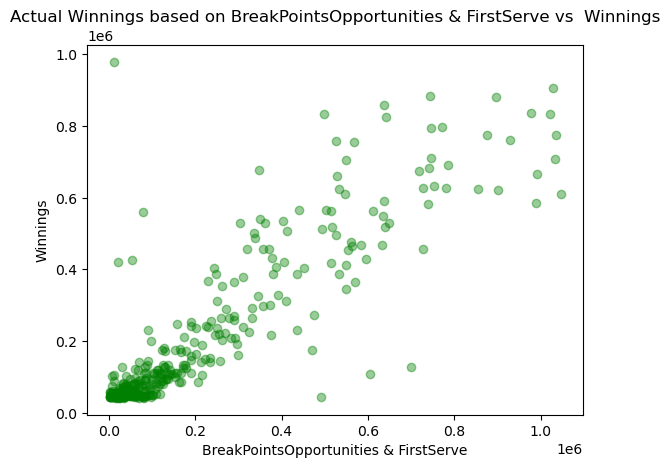

Accuracy: 77.60204027514715


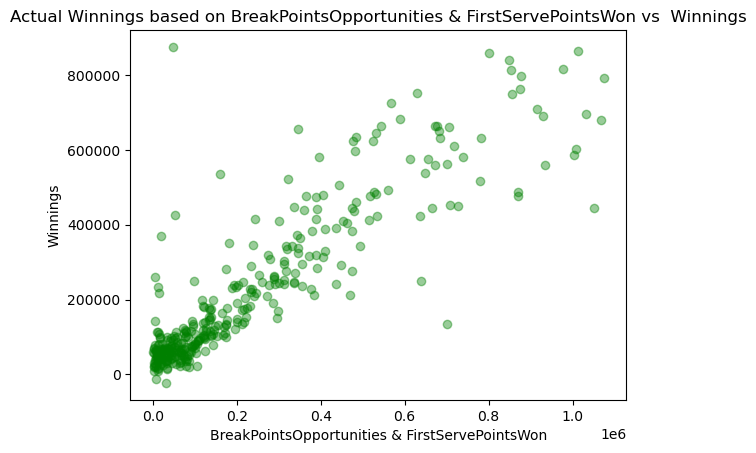

Accuracy: 81.5079504257683


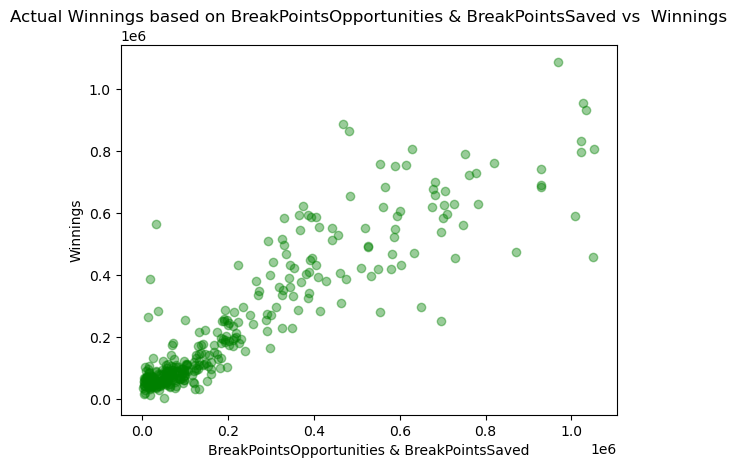

Accuracy: 82.77084152170087


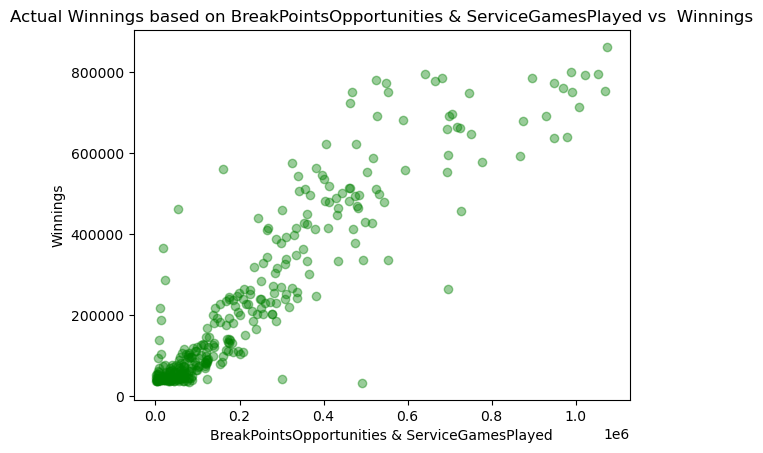

Accuracy: 83.43659061860811


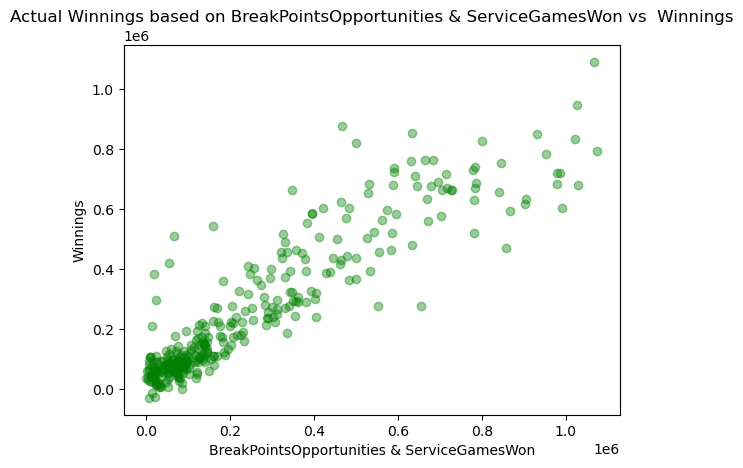

Accuracy: 80.32874402434396


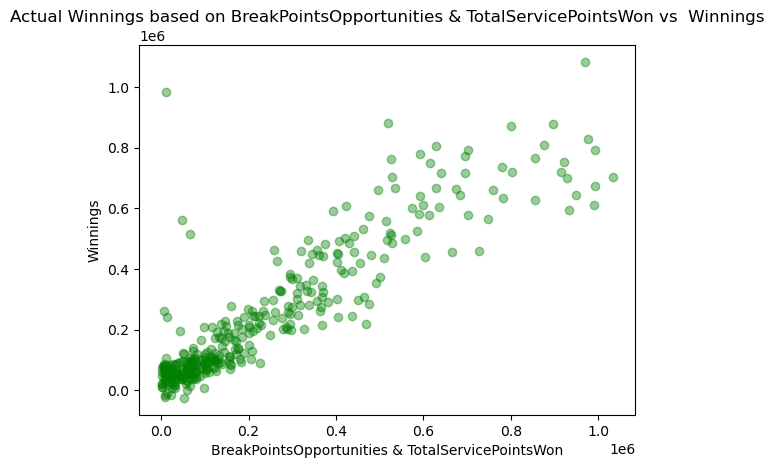

Accuracy: 82.1529008730783


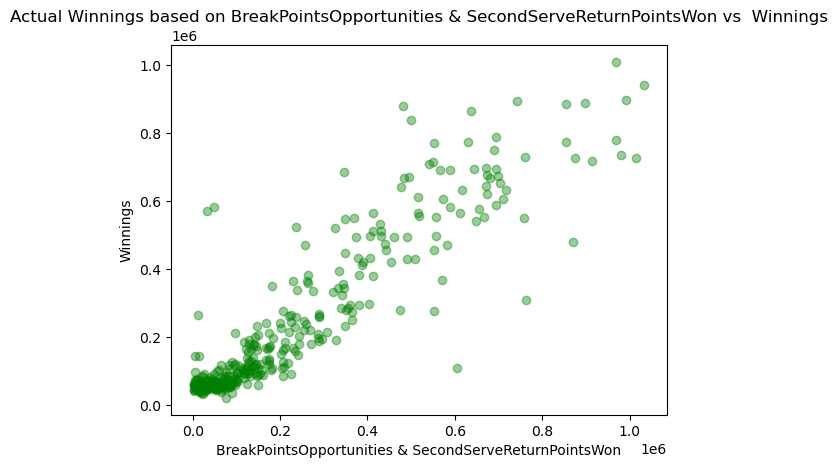

Accuracy: 77.54078079130186


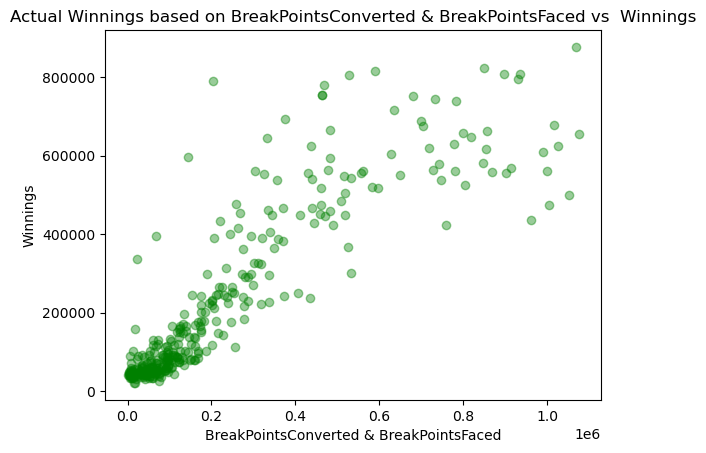

Accuracy: 81.95711802688879


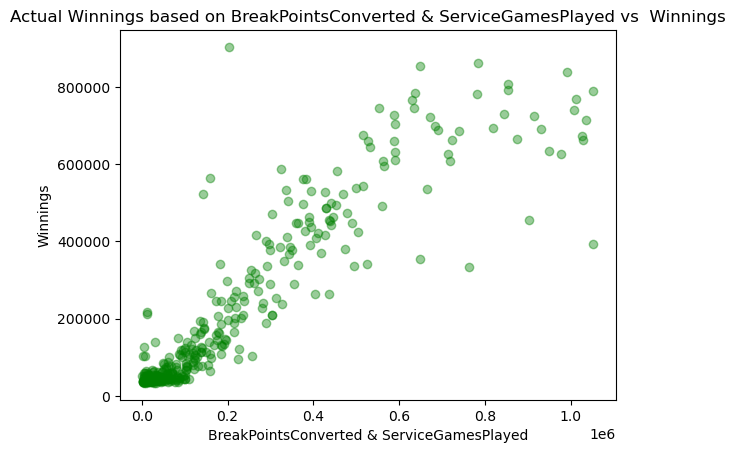

Accuracy: 82.66083147419997


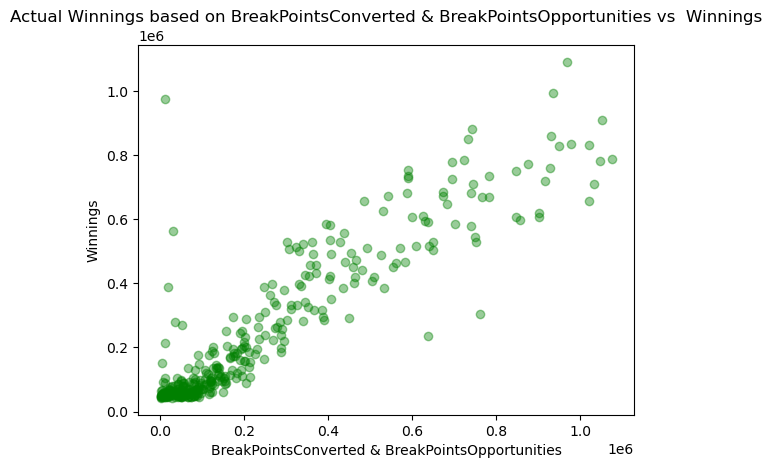

Accuracy: 85.80939380953535


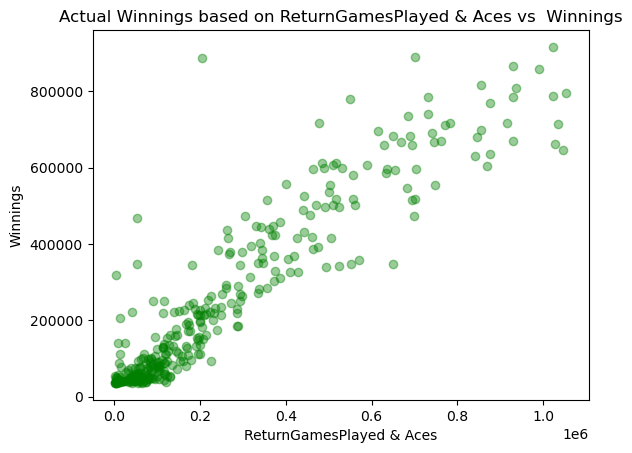

Accuracy: 80.36185183146728


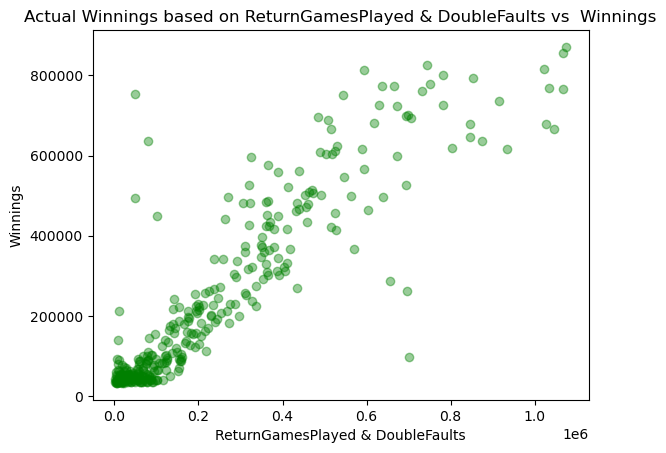

Accuracy: 80.10397159683116


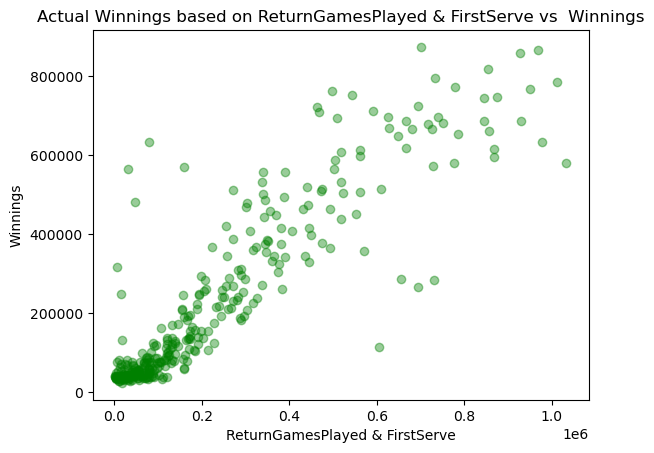

Accuracy: 82.5079022764189


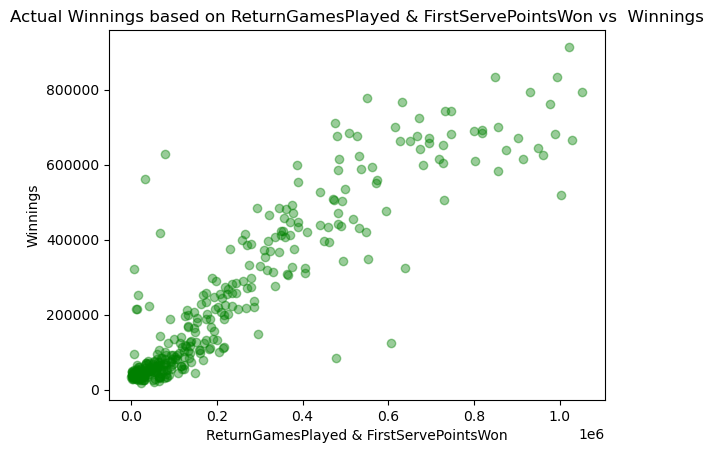

Accuracy: 84.54414864679168


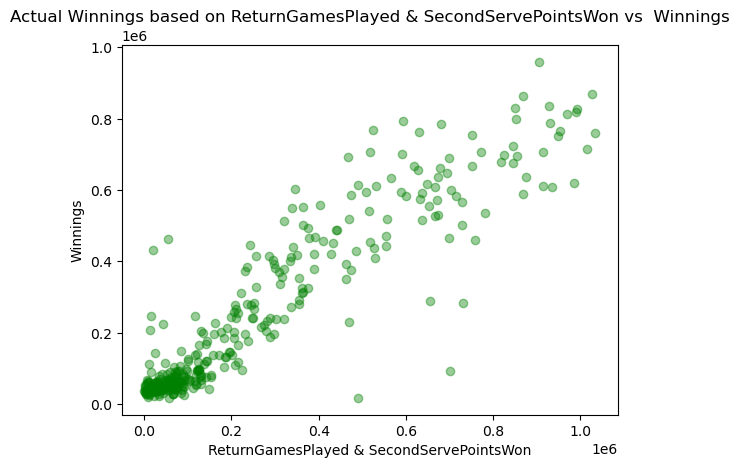

Accuracy: 82.7136723090972


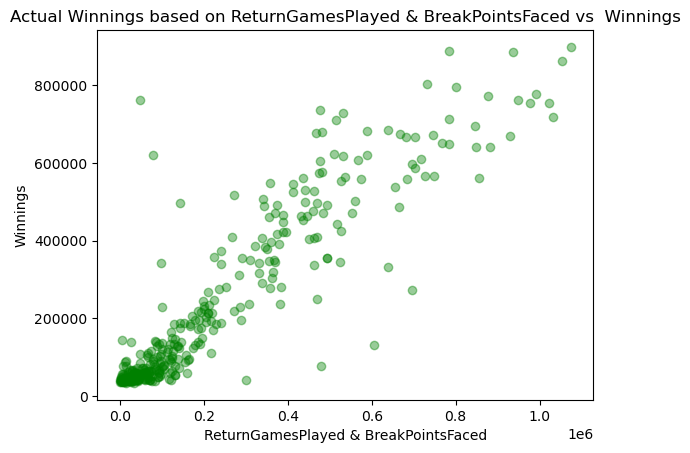

Accuracy: 85.80128617420482


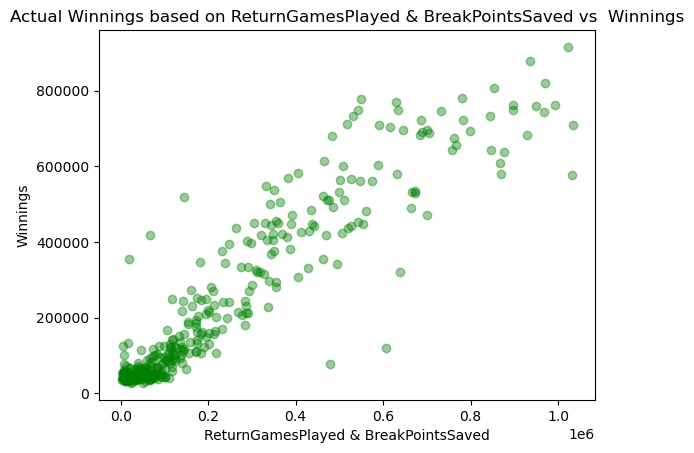

Accuracy: 84.7478787168794


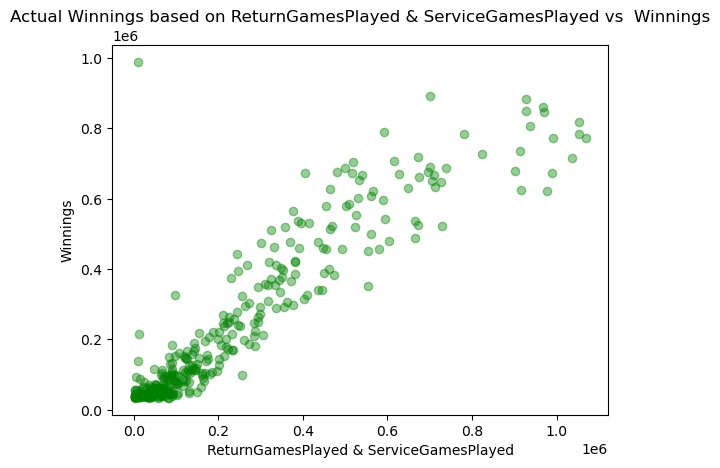

Accuracy: 82.933195017945


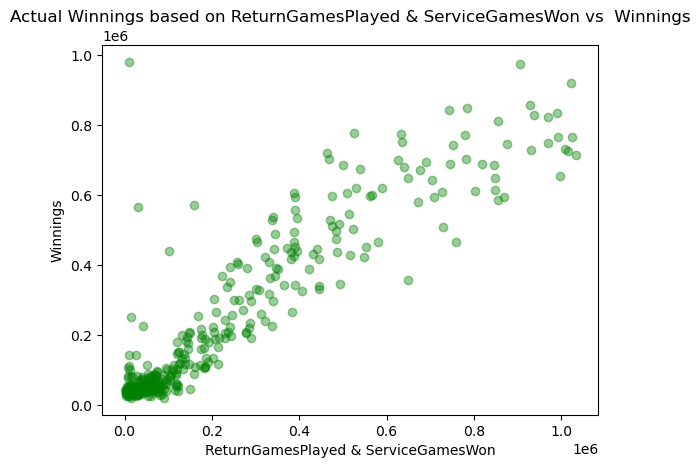

Accuracy: 85.6535069935183


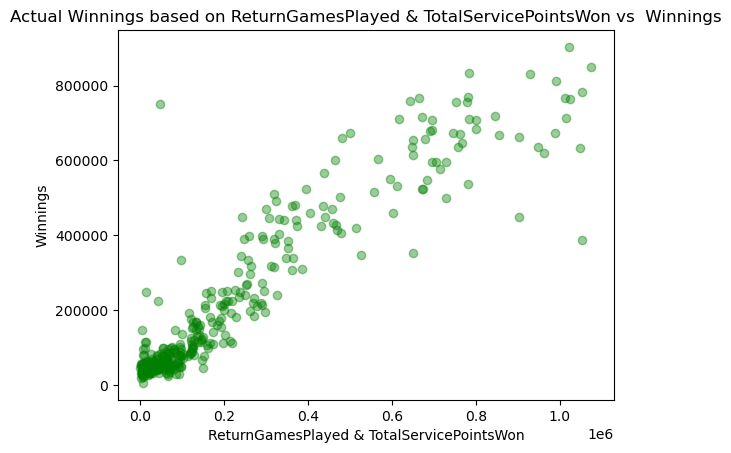

Accuracy: 83.04817970277644


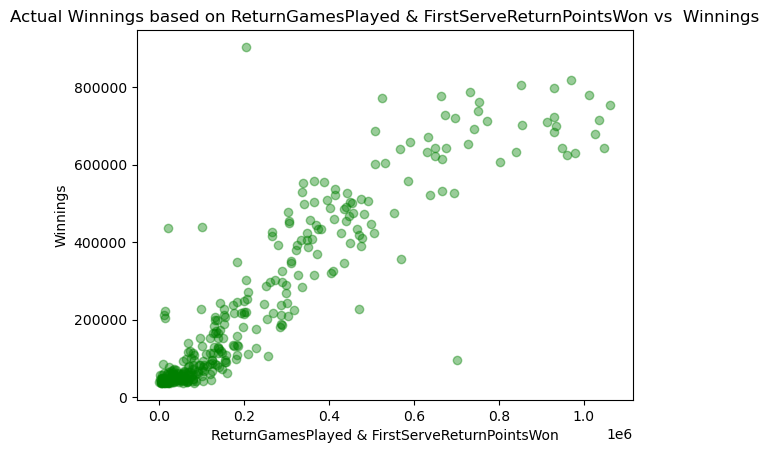

Accuracy: 84.68207077613405


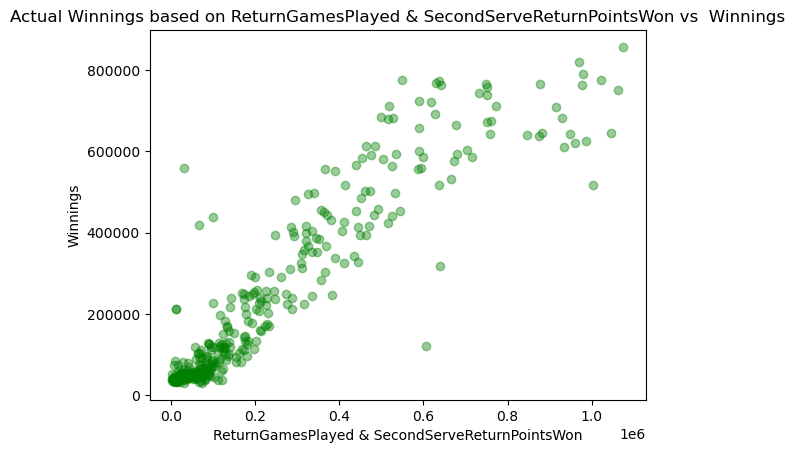

Accuracy: 83.93052303217861


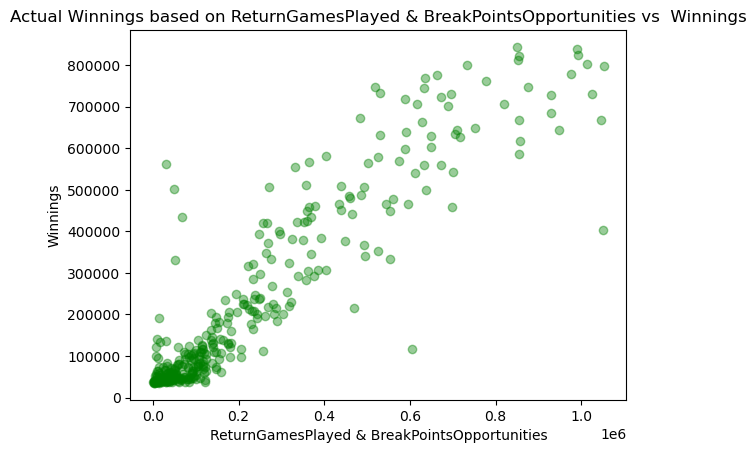

Accuracy: 89.01430057592988


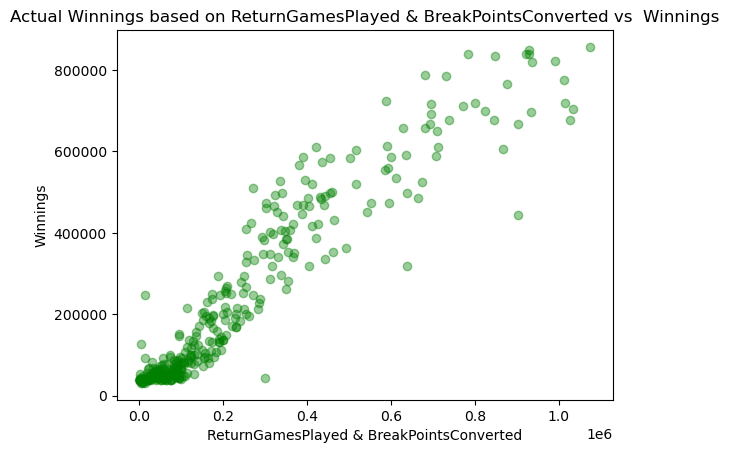

Accuracy: 75.85118703035498


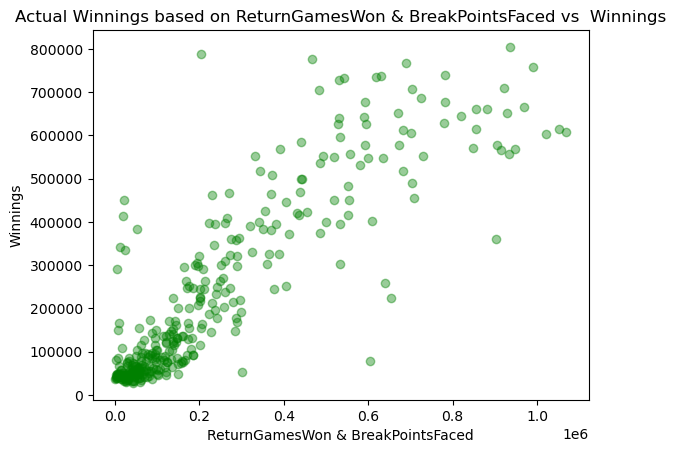

Accuracy: 82.90648036846034


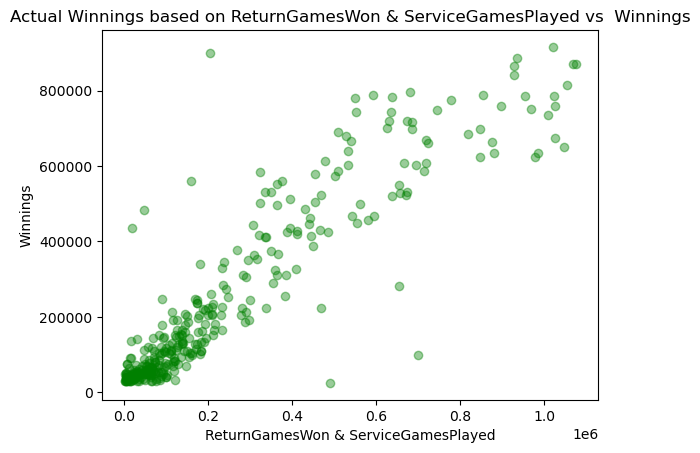

Accuracy: 80.7569825941788


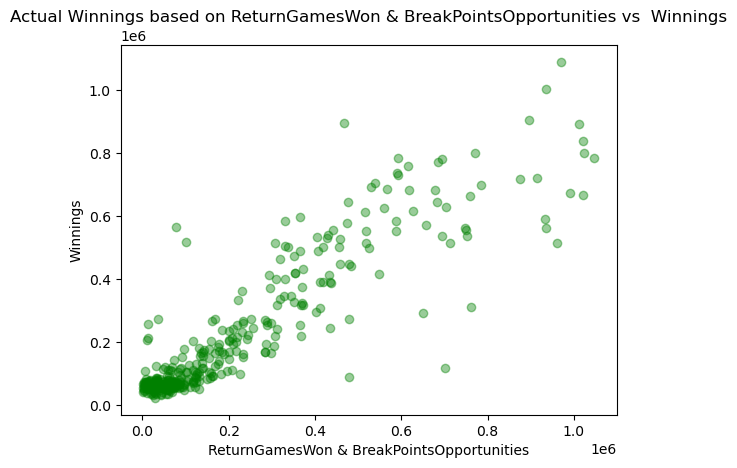

Accuracy: 80.91729647195575


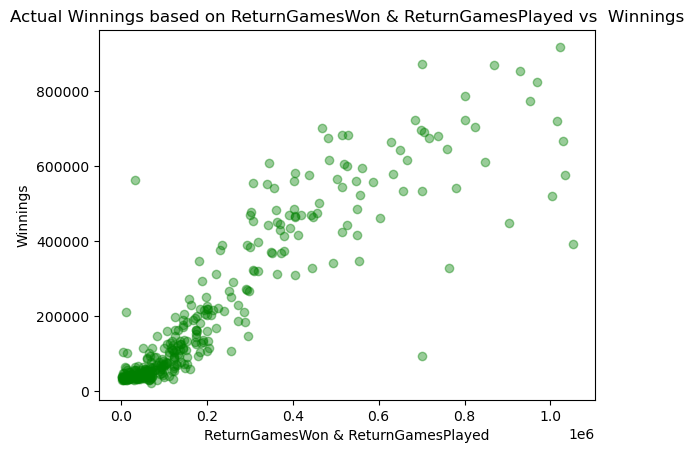

Accuracy: 80.61847282381527


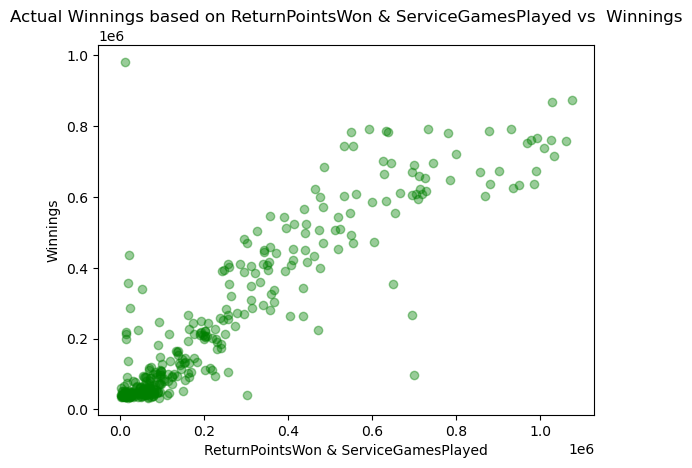

Accuracy: 85.27901942569241


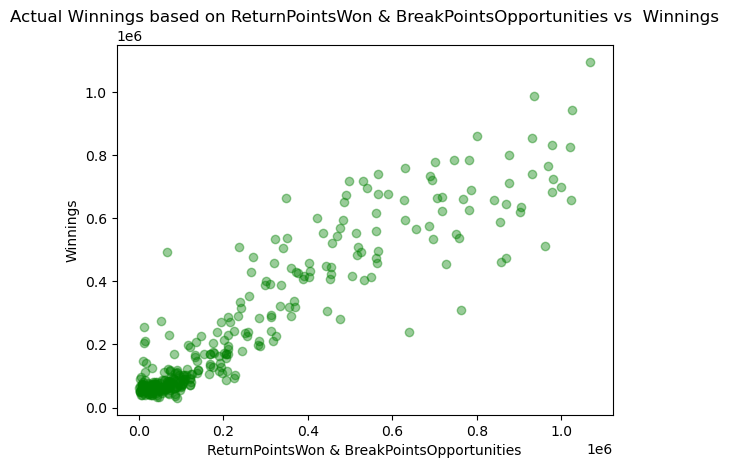

Accuracy: 82.20946033920211


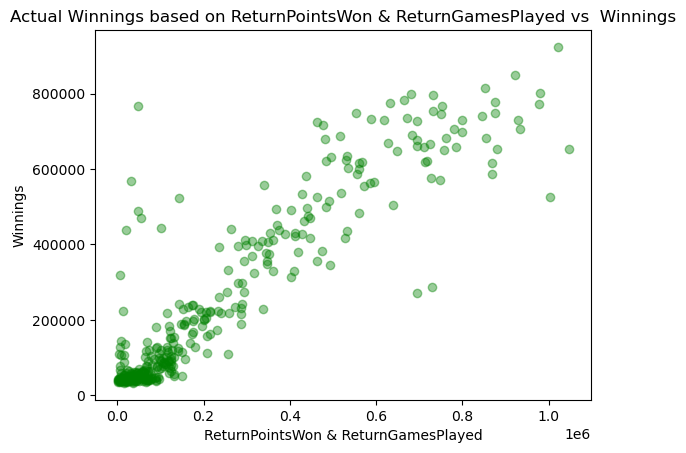

Accuracy: 75.76277220385279


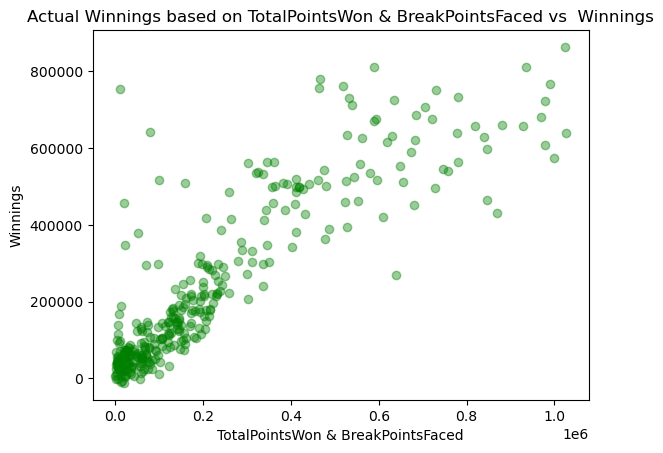

Accuracy: 83.24592170384119


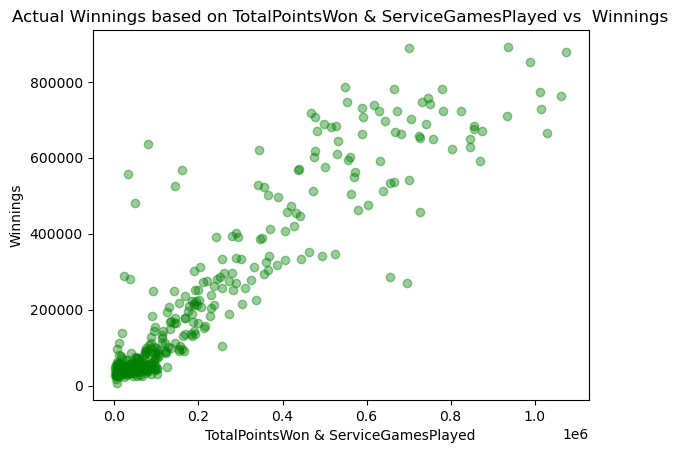

Accuracy: 82.92795725809215


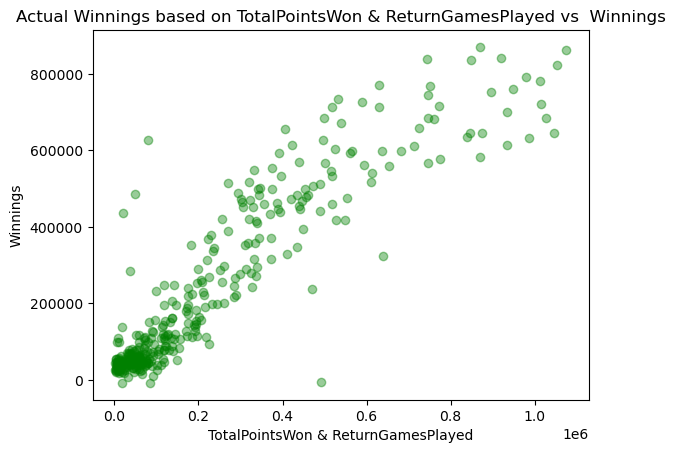

In [198]:
for i in range(len(independent)): 
    for j in range(len(independent)):
        if independent[i] != independent[j] and i >= j:
            #print(independent[i] + 'vs' + independent[j])
            feature = df[[independent[i], independent[j]]]#.values.reshape(-1,1)
            outcome = df['Winnings'].values.reshape(-1,1)
            feature_train, feature_test, outcome_train, outcome_test = train_test_split(feature,outcome,train_size=0.8)
            model = LinearRegression()
            model.fit(feature_train,outcome_train)
            R_squared = model.score(feature_test,outcome_test) * 100
            
            if R_squared > 75:
                print('Accuracy: ' + str(R_squared))
                prediction = model.predict(feature_test)
                plt.scatter(outcome_test, prediction, color='green', alpha=0.4)
                plt.xlabel(independent[i] + ' & ' + independent[j])
                plt.ylabel('Winnings')
                plt.title('Actual Winnings based on ' + independent[i] + ' & ' + independent[j] + ' vs ' + ' Winnings')
                plt.show()
            

            
        

